Maximum Deviation: +/- 8000 ticks


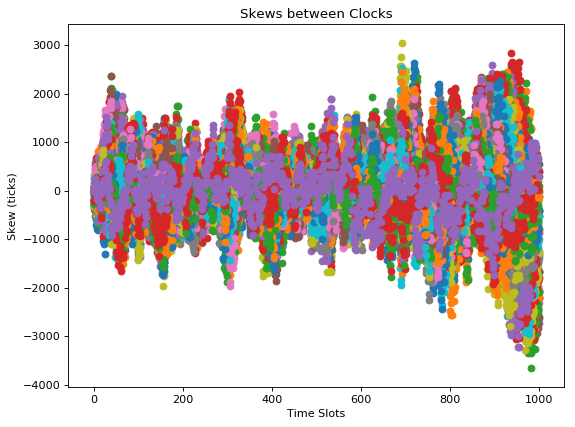

In [2]:
%matplotlib inline
from clocksync_funcs import *

# This simultaion implements Lonn's algorithm for clock synchronization and outputs the relative skew between nodes
# "A Fault Tolerant Clock Synchronization Algorithm for Systems With Low-Precision Oscillators" Henrik Lonn 1999


# Set Parameter Values:
clock_freq = 40        # oscillator frequency (MHz)
freq_tolerance = .5    # frequency stability in %
timeslot_period = 1    # timeslot period (milliseconds)
node_count = 10        # number of nodes
sim_length = 1000      # number of timeslots for simulation to run
r = 2.41               # r parameter for daisy chain algorithm 


# Run Simulation
clock_sync_sim(adjustment_func=daisy_adj,
               clock_freq=clock_freq, 
               freq_tolerance=freq_tolerance, 
               timeslot_period=timeslot_period, 
               node_count=node_count, 
               sim_length=sim_length, 
               r=r);
